In [1]:
import sqlite3
import pandas as pd

In [2]:
# Creates a file named 'my_data.db' if it doesn't exist
conn = sqlite3.connect('my_data.db')
cursor = conn.cursor()

In [4]:
import sqlite3
import pandas as pd
from datetime import datetime # We'll use this for sample date/time data

# --- 1. CONNECT TO DATABASE ---
# This connects to the database file (it will create 'my_sales_data.db' if it doesn't exist)
conn = sqlite3.connect('my_sales_data.db')
cursor = conn.cursor()

# --- 2. CREATE TABLE (The Corrected Structure) ---
try:
    # Execute the corrected CREATE TABLE statement
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS sales (
            transaction_id INTEGER PRIMARY KEY,
            customer_id INTEGER,
            customer_name TEXT,
            customer_age INTEGER,
            gender TEXT,
            product_id INTEGER,
            product_name TEXT,
            product_category TEXT,
            quantity INTEGER,           -- Corrected: quantity
            price REAL,                 -- Corrected: price (for decimals)
            payment_mode TEXT,
            purchase_date DATE,
            time_of_purchase TEXT,
            status TEXT
        );
    ''')
    conn.commit()
    print("Table 'sales' checked/created successfully.")
except sqlite3.Error as e:
    print(f"An error occurred during table creation: {e}")

# --- 3. INSERT SAMPLE DATA ---
# Inserting some sample rows so the query has data to run on.
sample_data = [
    (101, 1, 'Alice', 35, 'F', 501, 'Coffee Maker', 'Appliances', 1, 49.99, 'Credit Card', '2025-11-15', '10:30', 'Completed'),
    (102, 2, 'Bob', 22, 'M', 502, 'T-Shirt', 'Apparel', 2, 19.99, 'Cash', '2025-11-15', '14:45', 'Completed'),
    (103, 1, 'Alice', 35, 'F', 503, 'Milk', 'Grocery', 5, 3.50, 'Credit Card', '2025-11-16', '09:00', 'Completed'),
    (104, 3, 'Charlie', 48, 'M', 501, 'Coffee Maker', 'Appliances', 1, 49.99, 'Debit Card', '2025-11-16', '11:15', 'Completed'),
    (105, 2, 'Bob', 22, 'M', 504, 'Jeans', 'Apparel', 1, 59.99, 'Cash', '2025-11-17', '18:20', 'Pending'), # Pending status example
]

# We use INSERT OR IGNORE to prevent duplicate data if you run the cell multiple times
cursor.executemany("""
    INSERT OR IGNORE INTO sales VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", sample_data)
conn.commit()
print("Sample data inserted.")

# --- 4. EXECUTE SQL QUERY AND LOAD INTO PANDAS ---
# Analytical Query: Calculate the total revenue and count of transactions by product category
analytical_query = """
SELECT
    product_category,
    COUNT(transaction_id) AS transaction_count,
    SUM(quantity * price) AS total_revenue
FROM
    sales
WHERE
    status = 'Completed' -- Only count completed transactions
GROUP BY
    product_category
ORDER BY
    total_revenue DESC;
"""

# pd.read_sql_query is the easiest way to run SQL and get a DataFrame back
results_df = pd.read_sql_query(analytical_query, conn)

print("\n--- SQL Analysis Results (as Pandas DataFrame) ---")
print(results_df)

# --- 5. CLOSE CONNECTION ---
conn.close()
print("\nDatabase connection closed.")

Table 'sales' checked/created successfully.
Sample data inserted.

--- SQL Analysis Results (as Pandas DataFrame) ---
  product_category  transaction_count  total_revenue
0       Appliances                  2          99.98
1          Apparel                  1          39.98
2          Grocery                  1          17.50

Database connection closed.


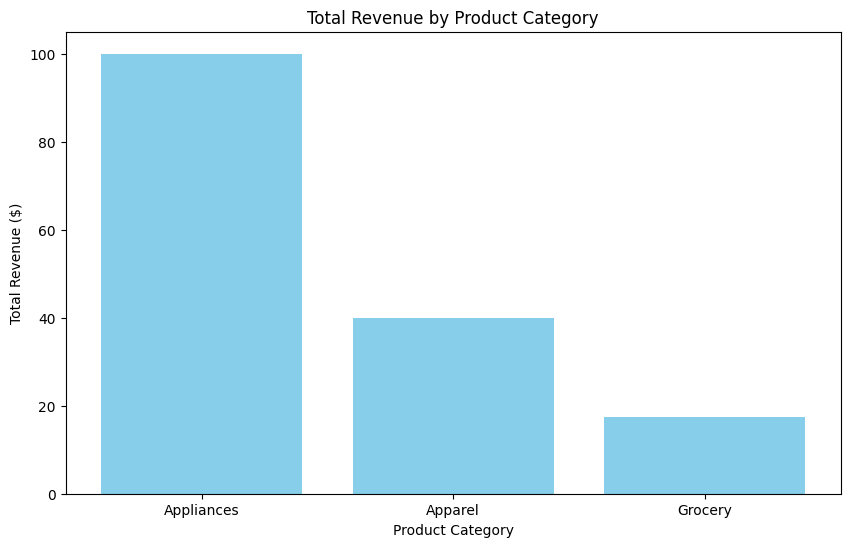

In [5]:
import matplotlib.pyplot as plt

# Plotting the total revenue by category
plt.figure(figsize=(10, 6))
plt.bar(results_df['product_category'], results_df['total_revenue'], color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.show()